<a href="https://colab.research.google.com/github/Sonia-Mokhtari/Deep-Learning/blob/sp25_KenParWay_data02/sp25_GhaMokNeg_data02_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction and Dataset Overview
Source/Link: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

Description: This dataset consists of fine food reviews from Amazon. These reviews include product and user information, ratings, and some plain text review. The data was collected from Oct 1999 - Oct 2012 and includes:
* 568,454 reviews
* 256,059 users
* 74,258 products
* 260 users > 50 reviews

Modality: Text

Problem Type: Classification (sentiment analysis) or Regression (predicting star ratings).

Target Labels:
* Sentiment analysis: Postivie, Neutral, and Negative
* Rating prediction: 1 - 5 stars

This dataset needs processing. Looking at the code section of the Kaggle page, one can see from other people's starter code that the distribution of both reviews ratings and review sentiment is skewed. Most of the data consists of positive, 5-star reviews. The task at hand involves analyzing Amazon food reviews to either predict their sentiment or to estimate a star rating. This allows us to understand customer opinions and improve product recommendations.

### Data Loading and Cleaning
Using the Gemini AI system (via a Google search), I learned that to upload csv files into Google Colab, I could use the following code
```
from google.colab import files
uploaded = files.upload()
```
This allows me to choose the csv file from my local drive. Prior to the use of Genimi, I knew that one could simply mount their Google drive instead. However, given that this code is being shared, I thought it best to utilize this option instead.

All that a user would need to run this code is a copy of the Reviews.csv file on their local drive. This can easily be obtained via Kaggle.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Reviews.csv to Reviews.csv


In [ ]:
# Now I simply use pandas to read the file and see its first five rows
import pandas as pd
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
# Here I check the columns and look at the details of the dataset
print(df.columns)

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,568454.0,2.842275e+05,1.640987e+05,1.0,1.421142e+05,2.842275e+05,4.263408e+05,5.684540e+05
HelpfulnessNumerator,568454.0,1.743817e+00,7.636513e+00,0.0,0.000000e+00,0.000000e+00,2.000000e+00,8.660000e+02
HelpfulnessDenominator,568454.0,2.228810e+00,8.289740e+00,0.0,0.000000e+00,1.000000e+00,2.000000e+00,9.230000e+02
Score,568454.0,4.183199e+00,1.310436e+00,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Time,568454.0,1.296257e+09,4.804331e+07,939340800.0,1.271290e+09,1.311120e+09,1.332720e+09,1.351210e+09


From the ```df.describe().T``` method, we can see that the only columns that have some sort of numerical data are:
* ID
* Helpfulness Numerator
* Helpfulness Denominator
* Score
* Time

The rest should be text, which we should be able to confirm with the ```.dtypes``` method

In [ ]:
df.dtypes

,0
Id,int64
ProductId,object
UserId,object
ProfileName,object
HelpfulnessNumerator,int64
HelpfulnessDenominator,int64
Score,int64
Time,int64
Summary,object
Text,object


The following categories are unecessary for our analysis in my opinion (for the following reasons):
1. ID - This just numbers the rows within our dataset.
2. ProductID, UserID, ProfileName - These are all identifiers for either the product (food) or the user (reviewer). However, I think these are not needed in our model. Consider a sentiment analysis model. We want the model to learn the sentiment of a review based on the text of the review, the text of the short summary, the number of stars, et cetera. If the model focuses on identifiers, it may learn to categorize reviews based on if a product had mostly popular reviews or if a user usually leaves bad reviews. This hinders the model's real world applicability, where it should (ideally) provide sentiment information soely based on the sentiment provided.
3. Time - The timing of a review shouldn't affect whether a review is good or bad.

In [ ]:
df.drop(columns=["Id", "ProductId", "UserId", "ProfileName", "Time"], inplace=True)

In [ ]:
df.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,0,0,5,Great taffy,Great taffy at a great price. There was a wid...


Now I wish to check for duplicates and null data values. For the case of duplicates, I will simply remove them. But, for the null values, I will check to see how much of dataset they comprise.

In [ ]:
# Searching for duplicated data. Since df.duplicated() returns boolean
# values, I need only sum it to find the total number of duplicated cells

print(df.duplicated().sum())
print(f"Percentage of duplicated cells: {100*df.duplicated().sum()/len(df):.3f}%")

172235
Percentage of duplicated cells: 30.299%


In [ ]:
# Here I remove all duplicates
df.drop_duplicates(inplace=True)
print(f"Remaining number of cells of data: {len(df)}")

Remaining number of cells of data: 396219


In [ ]:
# Now I search for all the null values in a similar way as for all the duplicates

print(df.isnull().sum())

HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Summary                   3
Text                      0
dtype: int64


In [ ]:
# Since there are only 3 nulls in the summary column out of a total of ~400k cells
# I will simply drop those rows

df.dropna(inplace=True)

In [ ]:
# Here I check to see that those duplicates were in fact dropped

print(df.isnull().sum())

HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Summary                   0
Text                      0
dtype: int64


In [ ]:
df.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,0,0,5,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HelpfulnessNumerator,396216.0,1.739836,6.880596,0.0,0.0,0.0,2.0,866.0
HelpfulnessDenominator,396216.0,2.213061,7.547327,0.0,0.0,1.0,2.0,923.0
Score,396216.0,4.177146,1.314422,1.0,4.0,5.0,5.0,5.0


The next steps involve the tackling of the remaining three numerical columns, as shown above. First, I will plot them to see how their distributions are.

In [ ]:
import matplotlib.pyplot as plt

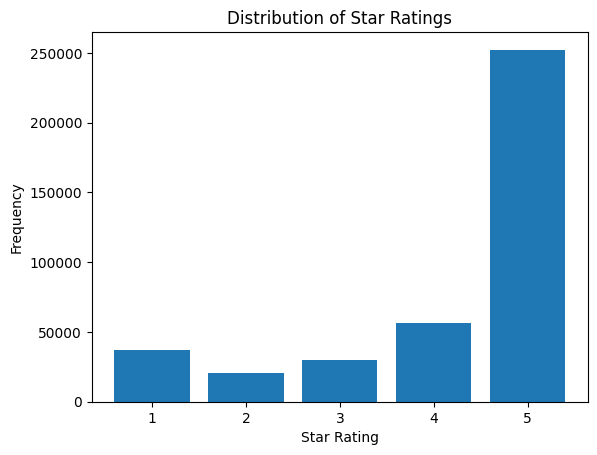

In [ ]:
# Here I used Gemini to assist me. In my work, I usually work with histograms,
# so I was not familiar with plotting bar charts with plt.

_ = plt.bar(df.Score.value_counts().index, df.Score.value_counts().values)
plt.xlabel("Star Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Star Ratings")
plt.show()

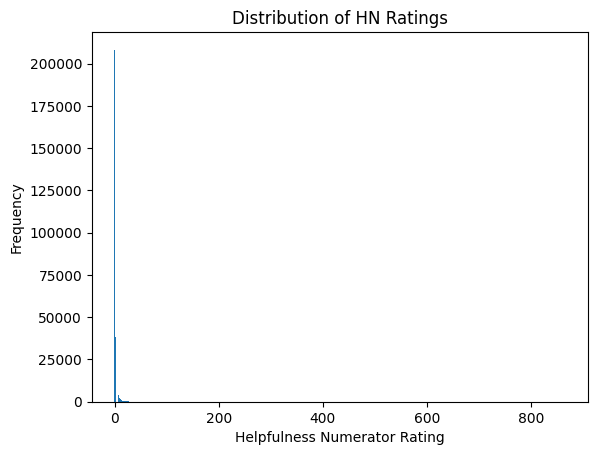

In [ ]:
_ = plt.bar(df.HelpfulnessNumerator.value_counts().index, df.HelpfulnessNumerator.value_counts().values)
plt.xlabel("Helpfulness Numerator Rating")
plt.ylabel("Frequency")
plt.title("Distribution of HN Ratings")
plt.show()

In [ ]:
df.HelpfulnessNumerator.unique()

array([  1,   0,   3,   4,   2,  19,  13,   9,  15,   5,  17,   8,   6,
         7,  43,  14,  11,  20,  27,  12,  10,  16,  21,  26,  23, 165,
        45,  30, 100,  32,  24,  22,  18,  59, 187,  29, 112, 107,  51,
        36,  25,  88,  35,  38,  42,  70,  86,  48,  34,  96,  53,  40,
        31,  65, 128,  97,  82,  37,  28, 202,  47, 149,  80,  77,  69,
        56,  39, 111,  60,  66,  44,  91, 115,  93, 180, 129,  58,  83,
        55,  62,  89,  50,  33, 135,  71, 157,  73, 122,  90,  81, 203,
       168,  64,  61, 398, 206, 133,  41,  84,  63,  95,  68, 110,  57,
        72,  52,  54,  49, 177,  46, 137, 286,  87, 264,  85, 258,  75,
       119, 123, 131, 125, 200, 536, 301,  78, 559, 472, 232, 294,  79,
        67, 154, 105,  74, 117, 113, 141, 162, 349, 130, 230, 189, 454,
       172, 116, 179, 138, 166, 142, 170, 247, 366, 106, 219,  94,  76,
        92, 413, 139, 866, 524, 233, 104, 844,  99, 144, 124, 491, 355,
       121, 192, 580, 102, 155, 436, 446, 262, 319, 103, 356, 43

In [ ]:
df.HelpfulnessDenominator.unique()

array([  1,   0,   3,   4,   2,   5,  19,  13,   9,   7,  15,   8,   6,
        10,  47,  17,  14,  27,  12,  11,  21,  31,  18,  23, 168,  46,
        30, 133,  16,  36,  25,  26,  24,  22,  29,  20,  64, 216,  33,
       112, 108,  51,  37,  39,  89,  35,  43,  42,  74,  49,  34,  28,
        53,  96,  58,  41,  65, 130, 100,  84,  38,  40,  32,  48, 219,
       155,  83,  85,  72,  56,  63, 128,  79,  76,  55,  68,  66,  44,
        94,  59, 117, 188, 134,  92,  57,  71,  98,  90,  45, 135, 170,
        77,  52, 123,  50,  93,  88, 122, 212, 192, 120, 401, 209,  95,
        86,  99,  73,  60, 124,  54,  61,  70, 180,  91,  81, 138, 163,
       307, 270, 151,  78,  62, 119, 139, 137, 215, 539, 305, 562, 477,
       235,  87,  69, 298,  75,  82, 103, 156, 110, 144,  80,  67, 127,
       162, 181, 356, 245, 462, 174, 111, 182, 143, 179, 159, 101, 171,
        97, 249, 384, 187, 121, 263, 131, 165, 416, 106, 878, 536, 238,
       109, 923, 115, 150, 371, 105, 154, 125, 149, 569, 360, 22

(0.0, 50.0)

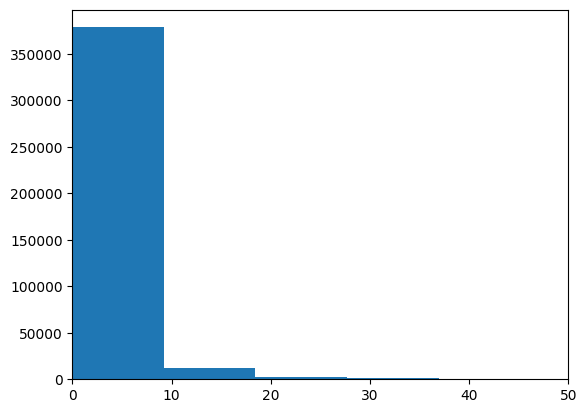

In [ ]:
_ = plt.hist(df.HelpfulnessDenominator, bins=100)
plt.xlim(0, 50)

As we can see, the score ratings are skewed towards the higher ratings (this could even be seen before plotting in the ```df.describe().T``` method above). After plotting the HelpfulnessNumerator values, it became clear that simply listing them would be more useful (even the histogram plots were not worth it).

Given this information, here is the plan:
1. I wish to convert the text columns into numerical values.
2. I wish to then apply SMOTE to oversample the classes with small samples, speciffically the star ratings data.

For the first task at hand, I learned of multiple embeding models such as Word2Vec, GloVe, and FastText which can take individual words in a string of text and tokenize them. After that, I could convert the tokens into numerical values.

Below the dotted lines are my previous attempts at tokenizing the code. Unfortunately, while the MPNet example was working, it would have taken two days to complete. As such, I will just use a simplified version of vectorizing. For this case, I will be using the Word2Vec model. The code that follows was inspired by the following two websites:

https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/

https://radimrehurek.com/gensim/models/word2vec.html

--------------------------------------------------------------------------------
Below the dotted line was my explanation as to why I was using the BERT model to transform my text columns ("Text" and "Summary) into numerical values. Unfortunately, this did not work and my setup couldn't handle it . As such, I will be trying out other methods. Since I really enjoyed the fact that BERT looked at other words around the word it wanted to tokenize, I will try to run another language model.

Using ChatGPT, it suggested that I use the MiniLM model, but I found that the MPNet model takes slightly longer but apparently performs better than the MiniLM model. So, using the code I had already set up previously (which could be found in older versions of this colab notebook), I will set up the MPNet model and use it to transform my text columns into numerical data.

--------------------------------------------------------------------------------
Through ChatGPT, I also discovered another transformer-based model: BERT (Bidirectional Encoder Representations from Transformers). Unlike traditional word embeddings, which assign a single fixed vector to each word, BERT captures the context of a word within a sentence. For example, consider the word "bank" in the following sentences:

* "I deposited money in the bank."
* "I sat by the bank of the river."

BERT can distinguish between these meanings because it analyzes the surrounding words in both directions. This bidirectional understanding allows it to generate different token representations for "bank" in each case, making it far more effective at understanding nuanced language.

Since the goal of this analysis is to create a model that can use the words of a review to predict it's sentiment, I thought that this would be the best tokenizer to use for out text columns.

The following section was created with the assistance of ChatGPT as well as using my homework from the previous semester's Machine Learning Course

In [ ]:
import numpy as np
import gensim.downloader as api

In [ ]:
# Here I load Google's Word2Vec code. Using ChatGPT as a guide, I will
# be utilizing the Google News 300D vectors model.

w2v = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
practice_sentence = "Hello, my name is Bob."
print(practice_sentence.split())
for word in practice_sentence.split():
  if word in w2v:
    print(w2v[word])
    print(np.mean(w2v[word]))

['Hello,', 'my', 'name', 'is', 'Bob.']
[ 1.44531250e-01  4.71191406e-02  1.00585938e-01  3.28125000e-01
 -2.02636719e-02 -1.72119141e-02  3.78417969e-02 -1.34765625e-01
 -1.25976562e-01  9.71679688e-02 -9.17968750e-02 -1.02539062e-01
  1.99890137e-03 -3.58886719e-02 -4.02343750e-01  5.29785156e-02
  3.12500000e-01  1.15234375e-01  1.49414062e-01 -1.45507812e-01
 -2.09960938e-02  1.90429688e-01  1.31835938e-01  4.51660156e-02
 -1.43554688e-01  5.29785156e-02 -1.01562500e-01  1.70898438e-02
  1.11328125e-01 -8.39843750e-02  2.40234375e-01  2.67333984e-02
  2.25830078e-02  2.19726562e-01  7.59124756e-04 -1.08886719e-01
  1.39648438e-01  7.71484375e-02  1.11083984e-02 -2.68554688e-02
 -3.15856934e-03  1.24511719e-02  3.02734375e-01  1.13525391e-02
  2.85156250e-01  1.98242188e-01 -1.22680664e-02  2.28271484e-02
  1.80664062e-01 -8.48388672e-03  9.32617188e-02  5.02929688e-02
  5.44433594e-02  6.39648438e-02 -1.05957031e-01  2.11914062e-01
 -1.32812500e-01 -5.61523438e-02  3.29589844e-02 -7

Now, from the websited provided and from the title of the model, the Word2Vec model provides a vector for each word. For a sentence with ten words, that is ten vectors, each with 300 dimensions.

Using the mock code I made in the previous cell, I could instead represent a word by the average of its 300d vectorization.

However, when a word wasn't in the 300d representation, I got an error (hence why I had to add the ```if``` statement). My output was just three vectors, so only three of those words were availiable. So, I will assign the values of those vectors myself.

After talking to Genimi, I have decided to set the vector values of unknown words to zeroes, so as to not bee too far off from the other vector representations which should average close to zero.

In [ ]:
# Using my previous code as a basis to this function
def get_vectorizations(text):
  words = text.split()
  vectorizations = [w2v[word] for word in words if word in w2v]
  return np.mean(vectorizations, axis=0) if vectorizations else np.zeros(300)

In [ ]:
df.Summary = df.Summary.apply(get_vectorizations)
df.Text = df.Text.apply(get_vectorizations)

In [ ]:
df.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,1,5,"[-0.23132324, -0.04305722, -0.036987305, 0.078...","[-0.03646232, 0.025060242, 0.0046432083, 0.100..."
1,0,0,1,"[0.035807293, 0.010106404, -0.010986328, 0.083...","[0.008793584, 0.018912986, 0.048699275, 0.0782..."
2,1,1,4,"[0.04012044, -0.04752159, 0.053710938, 0.05224...","[0.017986413, 0.015057131, 0.037313752, 0.0903..."
3,3,3,2,"[-0.084228516, 0.013305664, 0.0107421875, 0.01...","[0.011693464, 0.047685895, 0.04074293, 0.08880..."
4,0,0,5,"[0.075683594, -0.03857422, 0.0061035156, 0.210...","[0.009455063, 0.034459732, 0.029803108, 0.1241..."


Thankfully, during the previous semester, I learned of the SMOTE technique, which allows us to balance the star ratings of the data by creating synthetic samples. The code in this section is inspired by what we learned last semester.

In [ ]:
# df.dtypes
df_numeric = df.select_dtypes(include="int")
df_numeric.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score
0,1,1,5
1,0,0,1
2,1,1,4
3,3,3,2
4,0,0,5


In [ ]:
# SMOTE expects purely numeric data.
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
df_numeric, _ = smote.fit_resample(df_numeric, df_numeric.Score)

In [ ]:
df_numeric

,HelpfulnessNumerator,HelpfulnessDenominator,Score
0,1,1,5
1,0,0,1
2,1,1,4
3,3,3,2
4,0,0,5
...,...,...,...
1261445,2,2,4
1261446,1,2,4
1261447,0,0,4
1261448,0,0,4


From the mock code I have above, it clear that smote would work, but I don't think it is a good idea anymore. I wanted to convert the vectorizations into arrays and then save. But I don't think this is wise as I would be asking the computer to synthetically create sentences.

Instead, after consulting the internet and recalling what I learned in the machine learning course, I will perform weighted sampling with weights. This allows me to balance the scores column while note making synthetic data.

In [ ]:
df.Score.value_counts().tolist()

[252290, 56321, 36795, 29903, 20907]

In [ ]:
df.Score.value_counts().to_dict()

{5: 252290, 4: 56321, 1: 36795, 3: 29903, 2: 20907}

In [ ]:
df.Score.value_counts().to_dict().items()

dict_items([(5, 252290), (4, 56321), (1, 36795), (3, 29903), (2, 20907)])

In [ ]:
len(df)

396216

In [ ]:
value_counts = df.Score.value_counts().to_dict()
weights = {cls: len(df)/count for cls, count in value_counts.items()}
df["Sample_weights"] = df.Score.map(weights)

In [ ]:
df.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Sample_weights
0,1,1,5,"[-0.23132324, -0.04305722, -0.036987305, 0.078...","[-0.03646232, 0.025060242, 0.0046432083, 0.100...",1.570478
1,0,0,1,"[0.035807293, 0.010106404, -0.010986328, 0.083...","[0.008793584, 0.018912986, 0.048699275, 0.0782...",10.768202
2,1,1,4,"[0.04012044, -0.04752159, 0.053710938, 0.05224...","[0.017986413, 0.015057131, 0.037313752, 0.0903...",7.034960
3,3,3,2,"[-0.084228516, 0.013305664, 0.0107421875, 0.01...","[0.011693464, 0.047685895, 0.04074293, 0.08880...",18.951356
4,0,0,5,"[0.075683594, -0.03857422, 0.0061035156, 0.210...","[0.009455063, 0.034459732, 0.029803108, 0.1241...",1.570478


In [ ]:
# I had to consult the pandas sampling page to get a good undestanding of what to
# do below
df_sampled = df.sample(n=len(df), replace=True, weights=df.Sample_weights, random_state=0)

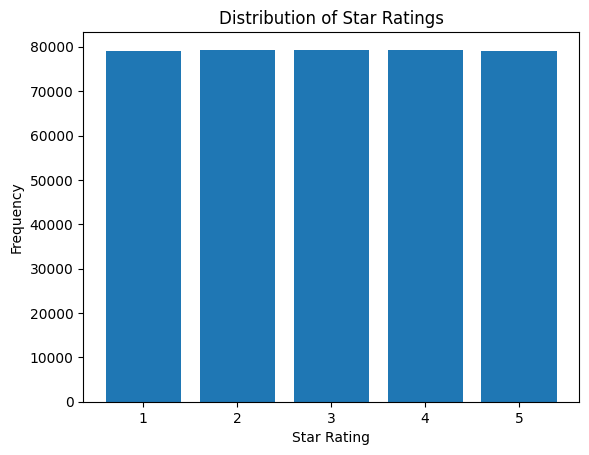

In [ ]:
# Just used the previous code to make this plot
_ = plt.bar(df_sampled.Score.value_counts().index, df_sampled.Score.value_counts().values)
plt.xlabel("Star Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Star Ratings")
plt.show()

### Converting Dataset into Tensor Format

Now, from the PyTorch website, one can find that to convert an entire dataframe
into tensor format with the following command
```
tensor_data = torch.tensor(df.values, dtype=torch.float32)
```
However, this would convert the entire dataframe into one tensor. Instead, I will use this as a basis. I will seperate the features from the targets. Then I will convert then, seperately, into pytorch tensors. Finally, I will save them as csv files. I did use ChatGPT to check and make sure that I had to use the .values method when I am dropping a column or using only one column, as I did below for the features and targets.

In [ ]:
# Here I drop the weights column from the sampled dataframe
df_sampled.drop(columns = ["Sample_weights"], inplace=True)

In [ ]:
# # According the Genimi, I need to deal with the vectorization columns. In order
# # to convert these into torch tensors, I need to convert the information into np
# # arrays. Genimi handed me this code below:
# for col in ['Summary', 'Text']:
#     df_sampled[col] = df_sampled[col].apply(lambda x: np.array(x, dtype=np.float32))

# The code above didn't work, so I consulted ChatGPT. The problem was that my
# Summary and Text columns wouldn't properly convert into numpy arrays. As such,
# I simply need to apply the np.array() method for each of the two columns
for col in ['Summary', 'Text']:
  df_sampled[col] = df_sampled[col].apply(lambda x: np.array(x, dtype=np.float32)
  if isinstance(x, list) else x)

In [ ]:
# Now I convert to Pytorch tensors
score_tensor = torch.tensor(df_sampled.Score.values, dtype=torch.float32)
hn = torch.tensor(df_sampled.HelpfulnessNumerator.values, dtype=torch.float32)
hd = torch.tensor(df_sampled.HelpfulnessDenominator.values, dtype=torch.float32)

In [ ]:
df_sampled["Summary"].iloc[0]

array([ 4.02570441e-02, -4.20968197e-02, -1.03969030e-01,  1.54279441e-01,
       -2.31061669e-04,  1.34347096e-01,  2.68467497e-02, -1.87395364e-01,
        1.16838729e-02,  1.09375000e-01, -1.02242604e-01, -5.24030402e-02,
        5.60128354e-02,  3.65339010e-03, -4.46951725e-02,  5.99190854e-02,
        2.03299388e-01, -2.24304199e-02, -3.10756136e-02, -3.80161824e-03,
       -5.35441823e-02,  1.29439220e-01,  8.80214125e-02,  9.80747789e-02,
        4.00041863e-02, -6.41392320e-02, -8.46121684e-02,  2.04624727e-01,
       -5.59169240e-02,  3.14243846e-02, -1.22981481e-01, -9.67581645e-02,
       -1.41601562e-02, -5.54547980e-02, -2.96140406e-02,  6.72781840e-02,
       -1.02225170e-01, -3.46668363e-02, -9.29827020e-02,  3.71965691e-02,
       -2.42047999e-02, -8.19963738e-02,  4.88804393e-02,  5.53676076e-02,
        1.96947367e-03, -1.95853099e-01, -3.93981934e-02, -1.43694198e-02,
        7.56835938e-03,  9.16006938e-02, -2.29753762e-01,  1.33998320e-01,
       -1.05939589e-01, -

In [ ]:
text_tensor = torch.tensor(np.vstack(df_sampled["Text"]), dtype=torch.float32)

In [ ]:
summary_tensor = torch.tensor(np.vstack(df_sampled["Summary"]), dtype=torch.float32)

In [ ]:
hn

tensor([0., 2., 3.,  ..., 9., 3., 0.])

In [ ]:
hn.unsqueeze(1)

tensor([[0.],
        [2.],
        [3.],
        ...,
        [9.],
        [3.],
        [0.]])

In [ ]:
torch.cat([hn, hd])

tensor([ 0.,  2.,  3.,  ..., 14.,  3.,  0.])

In [ ]:
torch.cat([hn.unsqueeze(1), hd.unsqueeze(1)], dim=1)

tensor([[ 0.,  0.],
        [ 2.,  3.],
        [ 3.,  9.],
        ...,
        [ 9., 14.],
        [ 3.,  3.],
        [ 0.,  0.]])

In [ ]:
# Here I create the features and target dataframes.
# features_df = torch.tensor(df_sampled.drop(columns=["Score"]).values, dtype=torch.float32)
targets_tensor = torch.tensor(df_sampled.Score.values, dtype=torch.float32)

# Instead of creating the df with torch tensor for the featrues, I will just
# concatenate them
features_tensor = torch.cat([hn.unsqueeze(1), hd.unsqueeze(1), text_tensor, summary_tensor], dim=1)

In [ ]:
features_tensor.shape

torch.Size([396216, 602])

In [ ]:
# Since they are in tensor format already, I can save them with the
# torch.save() method, but I need to mount my Drive to save it without it being
# local, so I guess I needed to mount after all.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
torch.save(features_tensor, "/content/drive/MyDrive/features_tensor.pt")
torch.save(targets_tensor, "/content/drive/MyDrive/targets_tensor.pt")